<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

# DonorsChoose

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Random Forest and GBDT  9th Assinment

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
print('done')

!pip install -U -q PyDrive


done
     |████████████████████████████████| 993kB 3.5MB/s 


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# links to google drive
link='https://drive.google.com/open?id=18VAiuw3vfETGcuJOdicvkgQT0pSxF7Wy'
link3='https://drive.google.com/open?id=1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j'
flufff, id2 = link3.split('=')
print (id2) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('glove_vectors') 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j


## 1.1 Reading Data

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


# for project data
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.csv')  
project_data = pd.read_csv('train_data.csv',nrows=20000)

print(project_data.shape)



#------------------------------------------------------------------------------------------------


link1='https://drive.google.com/open?id=11uHEj9KOgWD9SU-CPgKyb6VrWqVos4uV'
print('\n--------------------------------------------------------------')

# for resource data
fluff1, idi = link1.split('=')
print (idi) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':idi}) 
downloaded.GetContentFile('resources .csv')  
resource_data = pd.read_csv('resources .csv')


print(resource_data .head(3))

18VAiuw3vfETGcuJOdicvkgQT0pSxF7Wy
(20000, 17)

--------------------------------------------------------------
11uHEj9KOgWD9SU-CPgKyb6VrWqVos4uV
        id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1    8.45


In [4]:



print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

print(resource_data.shape)
print(resource_data.columns.values)

Number of data points in train data (20000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
(1541272, 4)
['id' 'description' 'quantity' 'price']


In [5]:
#sort the datapoints by date  <-

# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)# we drop the col
project_data.sort_values(by=['Date'], inplace=True)# sort the values y date


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0  ... project_is_approved
473       100660  ...                   1
7176       79341  ...                   1

[2 rows x 17 columns]

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [7]:
project_data.head(2)

Unnamed: 0  ...                                              essay
473       100660  ...  I recently read an article about giving studen...
7176       79341  ...  Computer coding and robotics, my second grader...

[2 rows x 18 columns]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [10]:
project_data.head(5)

Unnamed: 0  ...                                              essay
473       100660  ...  I recently read an article about giving studen...
7176       79341  ...  Computer coding and robotics, my second grader...
5145       50256  ...  Do you remember the book you read that made yo...
2521      164738  ...  My students are all struggling readers. I supp...
5364       14044  ...  The art room during a sculpture class is a bee...

[5 rows x 18 columns]

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

**Preprocessing of project_subject_categories**

---



In [0]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

# from collections import Counter
# my_counter = Counter()
# for word in project_data['clean_categories'].values:
#     my_counter.update(word.split())

# cat_dict = dict(my_counter)
# sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


**Preprocessing of project_subject_subcategories**

---



In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

**Preprocessing of project_grade_category**

---



In [0]:
d= list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in d:
    # consider we have text like this:
    for j in i.split(' '): #    # split by spae
        j=j.replace('Grades','')# clean grades from the row
        j=j.replace(' ','_')
        j=j.replace('  ','_')
    grade_cat_list.append(j.strip())
    


project_data['clean_grade'] = grade_cat_list 
project_data.drop(['project_grade_category'], axis=1, inplace=True)


# Assignment 9: Random Forest and GBDT 

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Preparing our data for the models</h1>

#<h2>2.1 Splitting data into Train and test: Stratified Sampling</h2>

---



In [14]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,
                                                  project_data['project_is_approved'],
                                                     test_size = 0.33,
                                                    stratify=  project_data['project_is_approved']
                                                   
                                                   )
print(y_train.value_counts())
print(y_test.value_counts())


1    11357
0     2043
Name: project_is_approved, dtype: int64
1    5594
0    1006
Name: project_is_approved, dtype: int64


# Text preprocessing of train and test

In [15]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 13400/13400 [00:08<00:00, 1615.72it/s]


In [16]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 6600/6600 [00:04<00:00, 1627.52it/s]


In [17]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_titles_train.append(sent.lower().strip())

100%|██████████| 13400/13400 [00:00<00:00, 34584.62it/s]


In [18]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_titles_test.append(sent.lower().strip())

100%|██████████| 6600/6600 [00:00<00:00, 34640.42it/s]


# 2.2.1 Response coding for Categorical Data

---



---



 **A. For School state categorical feature**

**Step1: Find the counts**

---



In [0]:

X_train_pos = X_train
[X_train['project_is_approved'] == 1]# first get all the positives

In [26]:
school_state_pos = {}# take a dictionary
for i in X_train_pos['school_state']:
  if i not in school_state_pos:
    school_state_pos[i]=1
  else:
     school_state_pos[i]+=1
    
    
# Python 3

first2pairs = {k: school_state_pos[k] for k in sorted(school_state_pos.keys())[:2]}
print(first2pairs)

{'AK': 44, 'AL': 199}


In [21]:
# For negatives:

X_train_neg = X_train.loc[X_train['project_is_approved'] == 0]# take al the negatives from the train
school_state_neg = {}

for a in X_train_neg['school_state'] :
    if a not in school_state_neg :
        school_state_neg[a] = 1
    else :
        school_state_neg[a] += 1
        
# Python 3

first2pairs = {k: school_state_neg[k] for k in sorted(school_state_neg.keys())[:2]}
print(first2pairs)

{'AK': 8, 'AL': 27}


In [0]:

#droping the y labels
#https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-by-column-name
#x_train = 
X_train.drop(["project_is_approved"], axis = 1, inplace = True) 
#x_test = 
X_test.drop(["project_is_approved"], axis = 1, inplace = True) 

In [27]:
# for total:      probabilitty of cat_attribute= positives/total

school_state_total = {}

for a in X_train['school_state'] :
    if a not in school_state_total :
        school_state_total[a] = 1
    else :
        school_state_total[a] += 1
        
        
        
        
# Python 3

first2pairs = {k: school_state_total[k] for k in sorted(school_state_total.keys())[:2]}
print(first2pairs)

{'AK': 44, 'AL': 199}


In [28]:

xx = list(school_state_total)[0]
print(xx)
print(school_state_pos['SC'])
print(school_state_neg['SC'])
print(school_state_total['SC'])

CA
497
75
497


**Step 2 : Find Probabilities with respect to classes**

---



In [29]:
#For positives probabilities
pos_prob_state = {}

for state in school_state_total.keys():
    pos_prob_state[state] = round(((school_state_pos[state])/float(school_state_total[state])),2)
    

    
    
        
# Python 3

first2pairs = {k: pos_prob_state[k] for k in sorted(pos_prob_state.keys())[:2]}
print(first2pairs)

{'AK': 1.0, 'AL': 1.0}


In [30]:
#For positives probabilities
neg_prob_state = {}

for state in school_state_total.keys():
    neg_prob_state[state] =  round(((school_state_neg[state])/float(school_state_total[state])),2)
    

    
    
        
# Python 3

first2pairs = {k: neg_prob_state[k] for k in sorted(neg_prob_state.keys())[:2]}
print(first2pairs)

{'AK': 0.18, 'AL': 0.14}


**Step 3 : Apply probabilities to Train data**

---



In [31]:
state_0_train = []
state_1_train = []

for a in X_train["school_state"] :
    state_0_train.append(neg_prob_state[a])
    state_1_train.append(pos_prob_state[a])
    
    # converted to list
X_train["state_0"] =state_0_train
X_train["state_1"] =state_1_train
X_train.head(2)

Unnamed: 0       id  ... state_0 state_1
3892        80154  p224807  ...    0.14     1.0
10779       64072  p245453  ...    0.15     1.0

[2 rows x 19 columns]

**Step 4 : Apply probabilities to Test data¶**

---



In [32]:
# we trained or calculated on the trian_data  and apply on the test data.


state_0_test = []
state_1_test = []

for a in X_test["school_state"] :
    state_0_test.append(neg_prob_state[a])
    state_1_test.append(pos_prob_state[a])
X_test["state_0"] =state_0_test
X_test["state_1"] =state_1_test
print(X_test.head(2))

      Unnamed: 0       id  ... state_0 state_1
6402      164815  p139130  ...    0.13     1.0
5768       89318  p252607  ...    0.18     1.0

[2 rows x 19 columns]


 **B. For Clean categorical feature   (Response coding)**

**Step1: Find the counts**

---



In [33]:
X_train.head(1)

Unnamed: 0       id  ... state_0 state_1
3892       80154  p224807  ...    0.14     1.0

[1 rows x 19 columns]

In [34]:
clean_category_pos = {}

for a in X_train_pos['clean_categories'] :
    for b in a.split():# one datapoint has multile attributes lke            Literacy_Language ,    Math_Science 
        if b not in clean_category_pos :
            clean_category_pos[b] = 1
        else :
            clean_category_pos[b] += 1
            
            
# Python 3

first2pairs = {k: clean_category_pos [k] for k in sorted(clean_category_pos .keys())[:5]}
print(first2pairs)

{'AppliedLearning': 1555, 'Care_Hunger': 177, 'Health_Sports': 1788, 'History_Civics': 686, 'Literacy_Language': 6408}


In [35]:
clean_category_neg = {}

for a in X_train_neg['clean_categories'] :
    for b in a.split():# one datapoint has multile attributes lke            Literacy_Language ,    Math_Science 
        if b not in clean_category_neg :
            clean_category_neg[b] = 1
        else :
            clean_category_neg[b] += 1
            
            
# Python 3

first2pairs = {k: clean_category_neg [k] for k in sorted(clean_category_neg .keys())[:5]}
print(first2pairs)

{'AppliedLearning': 270, 'Care_Hunger': 18, 'Health_Sports': 275, 'History_Civics': 103, 'Literacy_Language': 867}


In [36]:
clean_category_total = {}

for a in X_train['clean_categories'] :
    for b in a.split():
        if b not in clean_category_total :
            clean_category_total[b] = 1
        else :
            clean_category_total[b] += 1
            
# Python 3

first2pairs = {k: clean_category_total[k] for k in sorted(clean_category_total.keys())[:5]}
print(first2pairs)

{'AppliedLearning': 1555, 'Care_Hunger': 177, 'Health_Sports': 1788, 'History_Civics': 686, 'Literacy_Language': 6408}


**Step 2 : Find Probabilities with respect to classes**

---



In [37]:
pos_prob_category = {}

for st in clean_category_total.keys():
    pos_prob_category[st] = round(((clean_category_pos[st])/float(clean_category_total[st])),2)
    
    

first2pairs = {k:    pos_prob_category[k] for k in sorted(   pos_prob_category.keys())[:5]}
print(first2pairs)

{'AppliedLearning': 1.0, 'Care_Hunger': 1.0, 'Health_Sports': 1.0, 'History_Civics': 1.0, 'Literacy_Language': 1.0}


In [38]:
neg_prob_category = {}

for st in clean_category_total.keys():
    neg_prob_category[st] = round(((clean_category_neg[st])/float(clean_category_total[st])),2)
    
    

first2pairs = {k:    neg_prob_category[k] for k in sorted(   neg_prob_category.keys())[:5]}
print(first2pairs)

{'AppliedLearning': 0.17, 'Care_Hunger': 0.1, 'Health_Sports': 0.15, 'History_Civics': 0.15, 'Literacy_Language': 0.14}


**Step 3 : Apply probabilities to Train data**

---



In [39]:
cat_0_train = []
cat_1_train = []

for a in X_train["clean_categories"] :
    b = a.split()# if len is one then just do same as we done in school_state
    if len(b) == 1 :
        cat_0_train.append(neg_prob_category[a])
        cat_1_train.append(pos_prob_category[a])
    else :
        # max we have upto 2 length of category for one data point
          if len(b) ==3:
            c = neg_prob_category[b[0]]
            d = neg_prob_category[b[1]]
            d1=neg_prob_category[b[2]]
            e = pos_prob_category[b[0]]
            f = pos_prob_category[b[1]]
            f1 = pos_prob_category[b[2]]
              
              
            cat_0_train.append(round((c*d*d1),2))
            cat_1_train.append(round((e*f*f1),2))
            
          else:
            
              c = neg_prob_category[b[0]]
              d = neg_prob_category[b[1]]
              e = pos_prob_category[b[0]]
              f = pos_prob_category[b[1]]
        
              cat_0_train.append(round((c*d),2))
              cat_1_train.append(round((e*f),2))
        
        
X_train["cat_0"] = cat_0_train
X_train["cat_1"] = cat_1_train
X_train.head(2)

Unnamed: 0       id  ... cat_0 cat_1
3892        80154  p224807  ...  0.15   1.0
10779       64072  p245453  ...  0.03   1.0

[2 rows x 21 columns]

**Step 4 : Apply probabilities to Test data**

---



In [40]:
cat_0_test = []
cat_1_test = []

for a in X_test["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        cat_0_test.append(neg_prob_category[a])
        cat_1_test.append(pos_prob_category[a])
    else :
      
        if len(b) ==3:
            c = neg_prob_category[b[0]]
            d = neg_prob_category[b[1]]
            d1=neg_prob_category[b[2]]
            e = pos_prob_category[b[0]]
            f = pos_prob_category[b[1]]
            f1 = pos_prob_category[b[2]]
              
              
            cat_0_test.append(round((c*d*d1),2))
            cat_1_test.append(round((e*f*f1),2))
            
        else:
            
              c = neg_prob_category[b[0]]
              d = neg_prob_category[b[1]]
              e = pos_prob_category[b[0]]
              f = pos_prob_category[b[1]]
        
              cat_0_test.append(round((c*d),2))
              cat_1_test.append(round((e*f),2))
        
X_test["cat_0"] = cat_0_test
X_test["cat_1"] = cat_1_test
X_test.head(1)    

Unnamed: 0       id  ... cat_0 cat_1
6402      164815  p139130  ...  0.17   1.0

[1 rows x 21 columns]

**C) Sub-Categories of Projects- Response Coding**

**Step 1 : Find counts of each**

---



In [41]:
clean_subcategory_pos = {}

for a in X_train_pos['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_pos :
            clean_subcategory_pos[b] = 1
        else :
            clean_subcategory_pos[b] += 1
            
            
first2pairs = {k:    clean_subcategory_pos[k] for k in sorted(  clean_subcategory_pos .keys())[:5]}
print(first2pairs)

{'AppliedSciences': 1342, 'Care_Hunger': 177, 'CharacterEducation': 261, 'Civics_Government': 95, 'College_CareerPrep': 317}


In [42]:
clean_subcategory_neg = {}

for a in X_train_neg['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_neg :
            clean_subcategory_neg[b] = 1
        else :
            clean_subcategory_neg[b] += 1
            
            
          
first2pairs = {k:    clean_subcategory_neg[k] for k in sorted(  clean_subcategory_neg .keys())[:5]}
print(first2pairs)

{'AppliedSciences': 223, 'Care_Hunger': 18, 'CharacterEducation': 57, 'Civics_Government': 12, 'College_CareerPrep': 56}


In [43]:
clean_subcategory_total = {}

for a in X_train['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_total :
            clean_subcategory_total[b] = 1
        else :
            clean_subcategory_total[b] += 1
            
first2pairs = {k:    clean_subcategory_total[k] for k in sorted(  clean_subcategory_total.keys())[:5]}
print(first2pairs)            

{'AppliedSciences': 1342, 'Care_Hunger': 177, 'CharacterEducation': 261, 'Civics_Government': 95, 'College_CareerPrep': 317}


**Step 2 : Find Probabilities with respect to classes**

---



In [44]:
pos_prob_subcategory = {}

for sw in clean_subcategory_total.keys():
    pos_prob_subcategory[sw] = round(((clean_subcategory_pos[sw])/float(clean_subcategory_total[sw])),2)
    
    
first2pairs = {k: pos_prob_subcategory[k] for k in sorted(  pos_prob_subcategory.keys())[:5]}
print(first2pairs)       

{'AppliedSciences': 1.0, 'Care_Hunger': 1.0, 'CharacterEducation': 1.0, 'Civics_Government': 1.0, 'College_CareerPrep': 1.0}


In [45]:
neg_prob_subcategory = {}

for sw in clean_subcategory_total.keys():
    neg_prob_subcategory[sw] =round (((clean_subcategory_neg[sw])/float(clean_subcategory_total[sw])),2)

        
first2pairs = {k: neg_prob_subcategory[k] for k in sorted(  neg_prob_subcategory.keys())[:5]}
print(first2pairs)       
    

{'AppliedSciences': 0.17, 'Care_Hunger': 0.1, 'CharacterEducation': 0.22, 'Civics_Government': 0.13, 'College_CareerPrep': 0.18}


**Step 3 : Apply probabilities to Train data**

---



In [46]:
subcat_0_train = []
subcat_1_train = []

for a in X_train["clean_subcategories"]:
    b = a.split()
    if len(b) == 1 :
        subcat_0_train.append(neg_prob_subcategory[a])
        subcat_1_train.append(pos_prob_subcategory[a])
    else :
        if len(b) ==3:# max lenght of categories in one datapoint is 3
          
            c = neg_prob_subcategory[b[0]]
            d = neg_prob_subcategory[b[1]]
            d1=neg_prob_subcategory[b[2]]
            e = pos_prob_subcategory[b[0]]
            f = pos_prob_subcategory[b[1]]
            f1 = pos_prob_subcategory[b[2]]
              
              
            subcat_0_train.append(round((c*d*d1),2))
            subcat_1_train.append(round((e*f*f1),2))
              
        else:
            
              
             
          
            c = neg_prob_subcategory[b[0]]
            d = neg_prob_subcategory[b[1]]
            e = pos_prob_subcategory[b[0]]
            f = pos_prob_subcategory[b[1]]
        
            subcat_0_train.append(round((c*d),2))
            subcat_1_train.append(round((e*f),2))
        
        
        
        
X_train["subcat_0"] = subcat_0_train
X_train["subcat_1"] = subcat_1_train
X_train.head(1)

Unnamed: 0       id  ... subcat_0 subcat_1
3892       80154  p224807  ...     0.02      1.0

[1 rows x 23 columns]

**Step 4 : Apply probabilities to Test data¶**

---



In [47]:
subcat_0_test = []
subcat_1_test = []

for a in X_test["clean_subcategories"]:
    b = a.split()
    if len(b) == 1 :
        subcat_0_test.append(neg_prob_subcategory[a])
        subcat_1_test.append(pos_prob_subcategory[a])
    else :
        if len(b) ==3:# max lenght of categories in one datapoint is 3
          
            c = neg_prob_subcategory[b[0]]
            d = neg_prob_subcategory[b[1]]
            d1=neg_prob_subcategory[b[2]]
            e = pos_prob_subcategory[b[0]]
            f = pos_prob_subcategory[b[1]]
            f1 = pos_prob_subcategory[b[2]]
              
              
            subcat_0_test.append(round((c*d*d1),2))
            subcat_1_test.append(round((e*f*f1),2))
              
        else:
            
              
             
          
            c = neg_prob_subcategory[b[0]]
            d = neg_prob_subcategory[b[1]]
            e = pos_prob_subcategory[b[0]]
            f = pos_prob_subcategory[b[1]]
        
            subcat_0_test.append(round((c*d),2))
            subcat_1_test.append(round((e*f),2))
        
        
        
        
X_test["subcat_0"] = subcat_0_test
X_test["subcat_1"] = subcat_1_test
X_test.head(1)

Unnamed: 0       id  ... subcat_0 subcat_1
6402      164815  p139130  ...     0.01      1.0

[1 rows x 23 columns]

**D) Project Grade Category- Response Coding**

**Step 1 : Find counts of each**

---



In [48]:
project_grade_pos = {}

for a in X_train_pos['clean_grade'] :
    if a not in project_grade_pos :
        project_grade_pos[a] = 1
    else :
        project_grade_pos[a] += 1
        
first2pairs = {k:   project_grade_pos[k] for k in sorted(  project_grade_pos.keys())[:5]}
print(first2pairs)            

{'3-5': 4559, '6-8': 2059, '9-12': 1313, 'PreK-2': 5469}


In [49]:
project_grade_neg = {}

for a in X_train_neg['clean_grade'] :
    if a not in project_grade_neg :
        project_grade_neg[a] = 1
    else :
        project_grade_neg[a] += 1
        
        
first2pairs = {k:   project_grade_neg [k] for k in sorted(  project_grade_neg .keys())[:5]}
print(first2pairs)            

{'3-5': 651, '6-8': 330, '9-12': 220, 'PreK-2': 842}


In [50]:
project_grade_total = {}

for a in X_train['clean_grade'] :
    if a not in project_grade_total :
        project_grade_total[a] = 1
    else :
        project_grade_total[a] += 1
        
first2pairs = {k:   project_grade_total [k] for k in sorted(  project_grade_total .keys())[:5]}
print(first2pairs)          

{'3-5': 4559, '6-8': 2059, '9-12': 1313, 'PreK-2': 5469}


**Step 2 : Find Probabilities with respect to classes¶**

---



In [51]:
pos_prob_grade_cat = {}

for sq in project_grade_total.keys():
    pos_prob_grade_cat[sq] = round(((project_grade_pos[sq])/float(project_grade_total[sq])),2)
    
    
first2pairs = {k:   pos_prob_grade_cat [k] for k in sorted(  pos_prob_grade_cat .keys())[:5]}
print(first2pairs)              


{'3-5': 1.0, '6-8': 1.0, '9-12': 1.0, 'PreK-2': 1.0}


In [52]:
neg_prob_grade_cat = {}

for sq in project_grade_total.keys():
    neg_prob_grade_cat[sq] =round(( (project_grade_neg[sq])/float(project_grade_total[sq])),2)
    
first2pairs = {k:   neg_prob_grade_cat [k] for k in sorted(  neg_prob_grade_cat .keys())[:5]}
print(first2pairs)       

{'3-5': 0.14, '6-8': 0.16, '9-12': 0.17, 'PreK-2': 0.15}


**Step 3 : Apply probabilities to Train data**

---



In [53]:
proj_grade_0_train = []
proj_grade_1_train = []

for a in X_train["clean_grade"] :
    proj_grade_0_train.append(neg_prob_grade_cat[a])
    proj_grade_1_train.append(pos_prob_grade_cat[a])
    
X_train["proj_grade_0"] = proj_grade_0_train
X_train["proj_grade_1"] = proj_grade_1_train
X_train.head(1)

Unnamed: 0       id  ... proj_grade_0 proj_grade_1
3892       80154  p224807  ...         0.15          1.0

[1 rows x 25 columns]

**Step 4 : Apply probabilities to Test data**

---



In [54]:
proj_grade_0_test = []
proj_grade_1_test = []

for a in X_test["clean_grade"] :
    proj_grade_0_test.append(neg_prob_grade_cat[a])
    proj_grade_1_test.append(pos_prob_grade_cat[a])
    
X_test["proj_grade_0"] = proj_grade_0_test
X_test["proj_grade_1"] = proj_grade_1_test
X_test.head(1)

Unnamed: 0       id  ... proj_grade_0 proj_grade_1
6402      164815  p139130  ...         0.16          1.0

[1 rows x 25 columns]

**E) Teacher Prefix- Response Coding**

**Step 1 : Find counts of each**

---



In [0]:
teacher_prefix_pos = {}

for a in X_train_pos['teacher_prefix'] :
    if a not in teacher_prefix_pos :
      
          teacher_prefix_pos[a] = 1
    else :
          teacher_prefix_pos[a] += 1
            

In [56]:
#teacher_prefix_pos[np.nan]=0
teacher_prefix_pos

{'Mr.': 1260, 'Mrs.': 6950, 'Ms.': 4892, 'Teacher': 297, nan: 1}

In [57]:
teacher_prefix_neg = {}

for a in X_train_neg['teacher_prefix'] :
    if a not in teacher_prefix_neg :
        teacher_prefix_neg[a] = 1
    else :
        teacher_prefix_neg[a] += 1
teacher_prefix_neg[np.nan]=0
teacher_prefix_neg

{'Mr.': 184, 'Mrs.': 1033, 'Ms.': 762, 'Teacher': 64, nan: 0}

In [0]:
teacher_prefix_total = {}

for a in X_train['teacher_prefix'] :
    if a not in teacher_prefix_total :
        teacher_prefix_total[a] = 1
    else :
        teacher_prefix_total[a] += 1# first2pairs = {k:   teacher_prefix_total [k] for k in sorted(  teacher_prefix_total .keys())[:5]}
# print(first2pairs)     

**Step 2 : Find Probabilities with respect to classes**

---



In [0]:
pos_prob_teacher_prefix = {}

for sw in teacher_prefix_total.keys():
    pos_prob_teacher_prefix[sw] = round(((teacher_prefix_pos[sw])/float(teacher_prefix_total[sw])),2)
                


In [0]:
neg_prob_teacher_prefix = {}

for sw in teacher_prefix_total.keys():
    
      neg_prob_teacher_prefix[sw] = round(((teacher_prefix_neg[sw])/float(teacher_prefix_total[sw])),2)
    


**Step 3 : Apply probabilities to Train data**

---



In [0]:
teacher_prefix_0_train = []
teacher_prefix_1_train = []

for a in X_train["teacher_prefix"] :
    teacher_prefix_0_train.append(neg_prob_teacher_prefix[a])
    teacher_prefix_1_train.append(pos_prob_teacher_prefix[a])
    
    
X_train["teacher_prefix_0"] = teacher_prefix_0_train
X_train["teacher_prefix_1"] = teacher_prefix_1_train

**Step 4 : Apply probabilities to Test data**

---



In [0]:
teacher_prefix_0_test = []
teacher_prefix_1_test = []

for a in X_test["teacher_prefix"] :
    teacher_prefix_0_test.append(neg_prob_teacher_prefix[a])
    teacher_prefix_1_test.append(pos_prob_teacher_prefix[a])
    
    
    
X_test["teacher_prefix_1"] = teacher_prefix_1_test
X_test["teacher_prefix_0"] = teacher_prefix_0_test

#<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

**Apply Baw featurezation** *essay*

---



In [63]:

X_train_essay=preprocessed_essays_train
X_test_essay=preprocessed_essays_test


X_train_title=preprocessed_titles_train
X_test_title=preprocessed_titles_test

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer6.fit(X_train_essay)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer6.transform(X_train_essay)
X_test_bow = vectorizer6.transform(X_test_essay)



print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)
# # so the dimension of alll are the same by using first fit and then transform
# print(vectorizer6.get_feature_names())
fb=vectorizer6.get_feature_names()

After vectorizations
(13400, 5000) (13400,)
(6600, 5000) (6600,)


**Apply Baw featurezation** *Title*

---



In [64]:
vectorizer7 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer7.fit(X_train_title)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_title = vectorizer7.transform(X_train_title)
X_test_bow_title = vectorizer7.transform(X_test_title)



print("After vectorizations")
print(X_train_bow_title.shape, y_train.shape)
print(X_test_bow_title.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
ft=vectorizer7.get_feature_names()


After vectorizations
(13400, 999) (13400,)
(6600, 999) (6600,)


**Applly tf-idf featureization** * titles*

---



---



In [65]:
#for titles
from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer8 = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer8.fit(X_train_title)# that is learned from trainned  data


# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_title = vectorizer8.transform(X_train_title)
X_test_tf_title = vectorizer8.transform(X_test_title)



print("After vectorizations")
print(X_train_tf_title.shape, y_train.shape)
print(X_test_tf_title.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
fb1=vectorizer8.get_feature_names()


After vectorizations
(13400, 999) (13400,)
(6600, 999) (6600,)


**Applly tf-idf featureization** *Essays*

---



In [66]:
#for essay
from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer9 = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer9.fit(X_train_essay)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_essay = vectorizer9.transform(X_train_essay)
X_test_tf_essay = vectorizer9.transform(X_test_essay)



print("After vectorizations")
print(X_train_tf_essay.shape, y_train.shape)
print(X_test_tf_essay.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
ft1=vectorizer9.get_feature_names()


After vectorizations
(13400, 5000) (13400,)
(6600, 5000) (6600,)


 
**Using Pretrained Models: Avg W2V**

---



In [0]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-sa ve-and-load-variables-in-python/ # make sure you have the glove_vectors file 
with open('glove_vectors', 'rb') as f:
  model = pickle.load(f)
  glove_words =  set(model.keys())# i have in drive


In [0]:
#for essay
# average Word2Vec
# compute average word2vec for each review.
def func(wordlist):
  

  train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(wordlist): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length    # we are taking the 300 dimensions  very large
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

  print(len(train_avg_w2v_vectors))
  print(len(train_avg_w2v_vectors[0]))
  return train_avg_w2v_vectors

In [69]:
train_avg_w2v_vectors=func(preprocessed_essays_train)
test_avg_w2v_vectors=func(preprocessed_essays_test)
#for titles
test_avg_w2v_vectors_title=func(preprocessed_titles_test)
train_avg_w2v_vectors_title=func(preprocessed_titles_train)

  4%|▍         | 270/6600 [00:00<00:02, 2697.22it/s]

13400
300


  0%|          | 0/13400 [00:00<?, ?it/s]

6600
300
6600
300


100%|██████████| 13400/13400 [00:00<00:00, 58431.92it/s]

13400
300


**1.5.2.3 Using Pretrained Models: TFIDF weighted W2V**

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:

# average Word2Vec
# compute average word2vec for each review.
def tf_idf_done(word_list):
  
  train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(word_list): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():#.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

  print(len(train_title_tfidf_w2v_vectors))
  print(len(train_title_tfidf_w2v_vectors[0]))
  return train_title_tfidf_w2v_vectors

In [72]:
#train_title_tfidf_w2v_vectors=tf_idf_done(tf_idf_train_title)
#train_title_tfidf_w2v_vector
train_tfidf_w2v_vectors=tf_idf_done(preprocessed_essays_train)
test_tfidf_w2v_vectors=tf_idf_done(preprocessed_essays_test)
#train_title_tfidf_w2v_vectors=tf_idf_done(tf_idf_train_title)
#train_title_tfidf_w2v_v   cdaaector
train_title_tfidf_w2v_vectors=tf_idf_done(preprocessed_titles_train)
test_title_tfidf_w2v_vectors=tf_idf_done(preprocessed_titles_test)

  1%|          | 55/6600 [00:00<00:11, 549.03it/s]

13400
300


 24%|██▍       | 3215/13400 [00:00<00:00, 32148.96it/s]

6600
300


 30%|██▉       | 1966/6600 [00:00<00:00, 19656.32it/s]

13400
300


100%|██████████| 6600/6600 [00:00<00:00, 25182.65it/s]

6600
300


# 1.5.3 Vectorizing Numerical features¶

**Standadized price for the  train,test and cv**

---



In [73]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head(2))


# we also have to do this in tran,test and cv
# so also merge the resource data with the trian,cv and test

X_train = pd.merge(X_train, price_data, on = "id", how = "left")
#print(x_train.columns)
X_test = pd.merge(X_test, price_data, on = "id", how = "left")

        id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21


In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


price_scalar =  StandardScaler()

price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(X_train['price'].values.reshape(-1, 1))



# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(X_test['price'].values.reshape(-1, 1))


**Stadadized Previous_year_tecaher_projects train,test and cv**

---





In [0]:
# previous_year_projects
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))





**Standaized the  Quantity column of the train,test and cv**

---



In [0]:



price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_qnty_standar = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

# Now standardize the data with above maen and variance.
test_qnty_standar = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))


#Merge all features  whchh we clean  till now**

---



**Prepare for set 1:**

---



In [0]:
state_0_train=X_train["state_0"].values.reshape(-1,1)
state_1_train=X_train["state_1"].values.reshape(-1,1)
cat_0_train=X_train["cat_0"].values.reshape(-1,1)
cat_1_train=X_train["cat_1"].values.reshape(-1,1)
subcat_1_train=X_train["subcat_1"].values.reshape(-1,1)
subcat_0_train=X_train["subcat_0"].values.reshape(-1,1)
proj_grade_0_train=X_train["proj_grade_0"].values.reshape(-1,1)
proj_grade_1_train=X_train["proj_grade_1"].values.reshape(-1,1)
teacher_prefix_0_train=X_train["teacher_prefix_0"].values.reshape(-1,1)
teacher_prefix_1_train=X_train["teacher_prefix_1"].values.reshape(-1,1)



state_0_test=X_test["state_0"].values.reshape(-1,1)
state_1_test=X_test["state_1"].values.reshape(-1,1)
cat_0_test=X_test["cat_0"].values.reshape(-1,1)
cat_1_test=X_test["cat_1"].values.reshape(-1,1)
subcat_1_test=X_test["subcat_1"].values.reshape(-1,1)
subcat_0_test=X_test["subcat_0"].values.reshape(-1,1)
proj_grade_0_test=X_test["proj_grade_0"].values.reshape(-1,1)
proj_grade_1_test=X_test["proj_grade_1"].values.reshape(-1,1)
teacher_prefix_0_test=X_test["teacher_prefix_0"].values.reshape(-1,1)
teacher_prefix_1_test=X_test["teacher_prefix_1"].values.reshape(-1,1)

In [78]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((X_train_bow_title,X_train_bow,# all bows
                   state_0_train,state_1_train,cat_0_train ,cat_1_train,subcat_1_train,subcat_0_train ,proj_grade_0_train,proj_grade_1_train,teacher_prefix_0_train,teacher_prefix_1_train,
                       
                      train_qnty_standar,train_price_standar,train_prev_proj_standar))# all numericals


print(X_set1_train.shape, y_train.shape)



(13400, 6012) (13400,)


In [79]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_test = hstack((X_test_bow_title,X_test_bow,
                         state_0_test,state_1_test,cat_0_test,cat_1_test,subcat_1_test,subcat_0_test,proj_grade_0_test,proj_grade_1_test,teacher_prefix_0_test,teacher_prefix_1_test,
                       
                      test_qnty_standar,test_price_standar,test_prev_proj_standar))


print(X_set1_test.shape, y_test.shape)



(6600, 6012) (6600,)


**Prepare for set 2:**

---



In [80]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_train = hstack((X_train_tf_essay,X_train_tf_title,
                                            state_0_train,state_1_train,cat_0_train ,cat_1_train,subcat_1_train,subcat_0_train ,proj_grade_0_train,proj_grade_1_train,teacher_prefix_0_train,teacher_prefix_1_train,
                       
                       train_qnty_standar,train_price_standar,train_prev_proj_standar)).tocsr()


print(X_set2_train.shape, y_train.shape)



(13400, 6012) (13400,)


In [81]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_test = hstack((X_test_tf_essay,X_test_tf_title,
                      state_0_test,state_1_test,cat_0_test,cat_1_test,subcat_1_test,subcat_0_test,proj_grade_0_test,proj_grade_1_test,teacher_prefix_0_test,teacher_prefix_1_test,
                     test_qnty_standar,test_price_standar,test_prev_proj_standar)).tocsr()


print(X_set2_test.shape, y_test.shape)



(6600, 6012) (6600,)


**Prepare for set 3:**

---



In [0]:
import numpy
train_avg_w2v_vectors=numpy.array(train_avg_w2v_vectors)
train_avg_w2v_vectors_title=numpy.array(train_avg_w2v_vectors_title)

In [83]:
print(cat_0_train.shape)
print(cat_1_train.shape)
print(subcat_0_train.shape)
print(subcat_1_train.shape)
print(state_0_train.shape)
print(state_1_train.shape)
print(proj_grade_0_train.shape)
print(proj_grade_1_train.shape)
print(teacher_prefix_0_train.shape)
print(teacher_prefix_1_train.shape)
print(train_price_standar.shape)
print(train_qnty_standar.shape)
print(train_prev_proj_standar.shape)
print(train_avg_w2v_vectors.shape)
print(train_avg_w2v_vectors_title.shape)

(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 1)
(13400, 300)
(13400, 300)


In [89]:

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_train = np.hstack((cat_0_train,cat_1_train,subcat_0_train,subcat_1_train,state_0_train,state_1_train,proj_grade_0_train,proj_grade_1_train,teacher_prefix_0_train,teacher_prefix_1_train,train_price_standar,train_qnty_standar,
                    train_prev_proj_standar, train_avg_w2v_vectors,train_avg_w2v_vectors_title ))

print(X_set3_train.shape, y_train.shape)



(13400, 613) (13400,)


In [90]:

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_test =np. hstack((
                     
                                        


cat_0_test,cat_1_test,subcat_0_test,subcat_1_test,state_0_test,state_1_test,proj_grade_0_test,proj_grade_1_test,teacher_prefix_0_test,teacher_prefix_1_test,
test_price_standar,test_qnty_standar,test_prev_proj_standar,test_avg_w2v_vectors,test_avg_w2v_vectors_title    ))

print(X_set3_test.shape, y_test.shape)



(6600, 613) (6600,)


**Prepare for set 4:**

In [91]:

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_train = np.hstack((cat_0_train,cat_1_train,subcat_0_train,subcat_1_train,state_0_train,state_1_train,proj_grade_0_train,proj_grade_1_train,teacher_prefix_0_train,teacher_prefix_1_train,train_price_standar,train_qnty_standar,
                    train_prev_proj_standar, train_tfidf_w2v_vectors,train_title_tfidf_w2v_vectors ))

print(X_set4_train.shape, y_train.shape)



(13400, 613) (13400,)


In [92]:

from scipy.sparse import hstack
# use the np.hstack othersize it shows error
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_test = np.hstack((


cat_0_test,cat_1_test,subcat_0_test,subcat_1_test,state_0_test,state_1_test,proj_grade_0_test,proj_grade_1_test,teacher_prefix_0_test,teacher_prefix_1_test,
test_price_standar,test_qnty_standar,test_prev_proj_standar,test_tfidf_w2v_vectors,test_title_tfidf_w2v_vectors))
print(X_set4_test.shape, y_test.shape)



(6600, 613) (6600,)


# 1. Applying Random Forest section

# 2.4.1 Applying Random Forest on BOW,<font color='red'> SET 1</font>




In [0]:




from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5,  7, 8,  10] }
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_set1_train, y_train)


In [0]:
clf1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

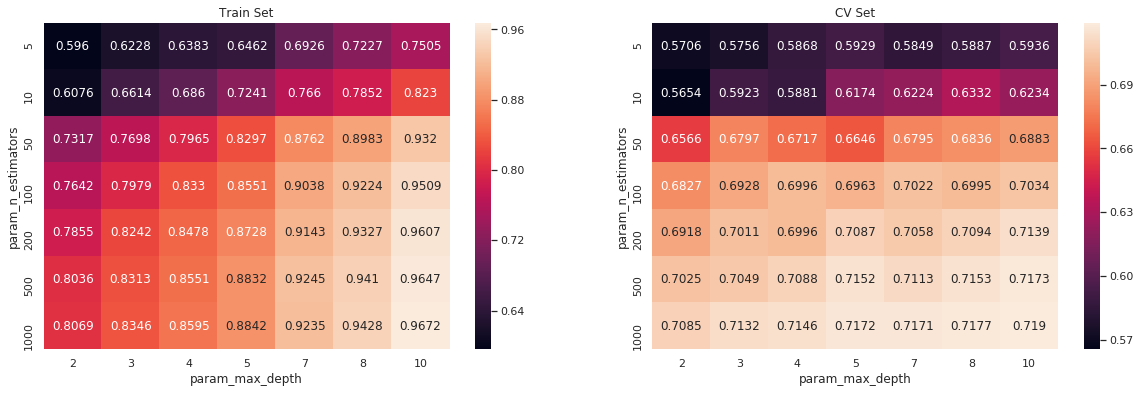

In [0]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

**Best Estimator and Best tune parameters**

---



In [0]:
print(clf1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf1.score(X_set1_train,y_train))
print(clf1.score(X_set1_test,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9415256669464228
0.7182679752731377


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [1000],  'max_depth':[10]  }  ]

**Fitting Model to Hyper-Parameter Curve**

---



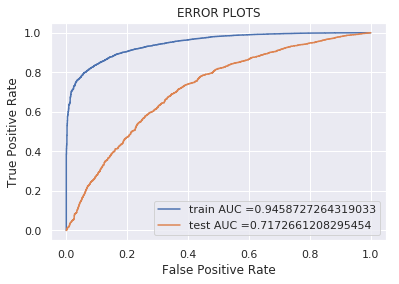

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set1_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set1_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set1_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion Matrix¶**

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1   # make it global 
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
            
    predictions1= predictions
    return predictions


the maximum value of tpr*(1-fpr) 0.76 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.45 for threshold 0.53


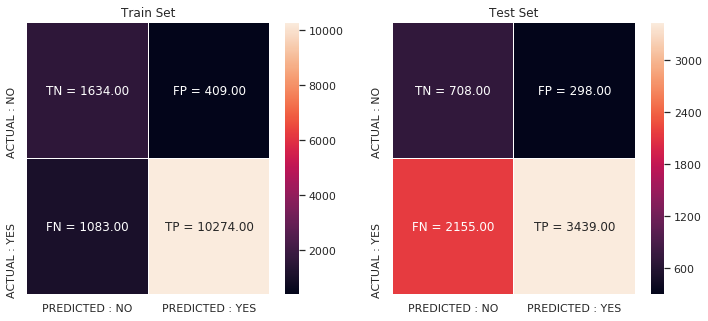

In [0]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

#2.4.2 Applying Random Forest on TFIDF,<font color='red'> SET 2</font>

In [0]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt2 = RandomForestClassifier(class_weight='balanced',min_samples_split=5)

parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5,  7, 8,  10] }
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_set2_train, y_train)


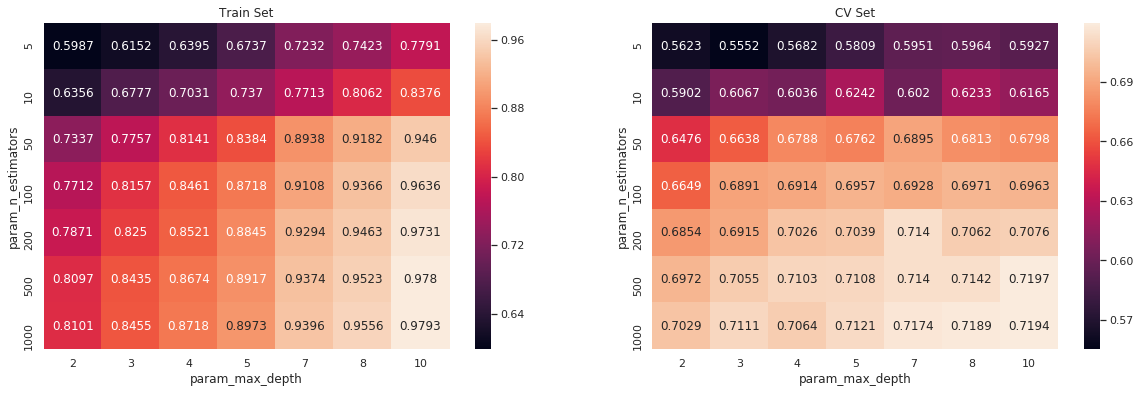

In [0]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

*****Best Estimator and Best tune parameters***

---

**

In [0]:
print(clf2.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf2.score(X_set2_train,y_train))
print(clf2.score(X_set2_test,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9594892345176573
0.7151081711376361


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [500],  'max_depth':[10]  }  ]

**Fitting Model to Hyper-Parameter Curve**

---



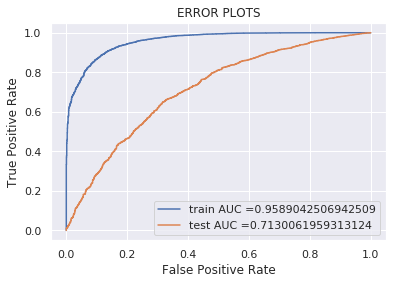

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set2_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set2_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set2_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

the maximum value of tpr*(1-fpr) 0.78 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.44 for threshold 0.54


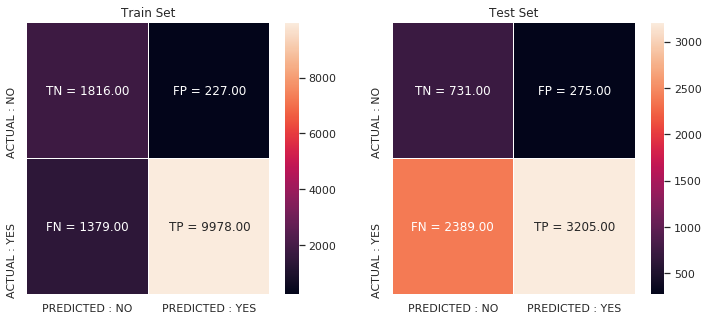

In [0]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

#2.4.3 Applying Random Forest on AVG W2V,<font color='red'> SET 3</font>

---



In [0]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt3 = RandomForestClassifier(class_weight='balanced',min_samples_split=3)

parameters ={'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5,  7, 8,  10] }
clf3 = GridSearchCV(dt3, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se3= clf3.fit(X_set3_train, y_train)


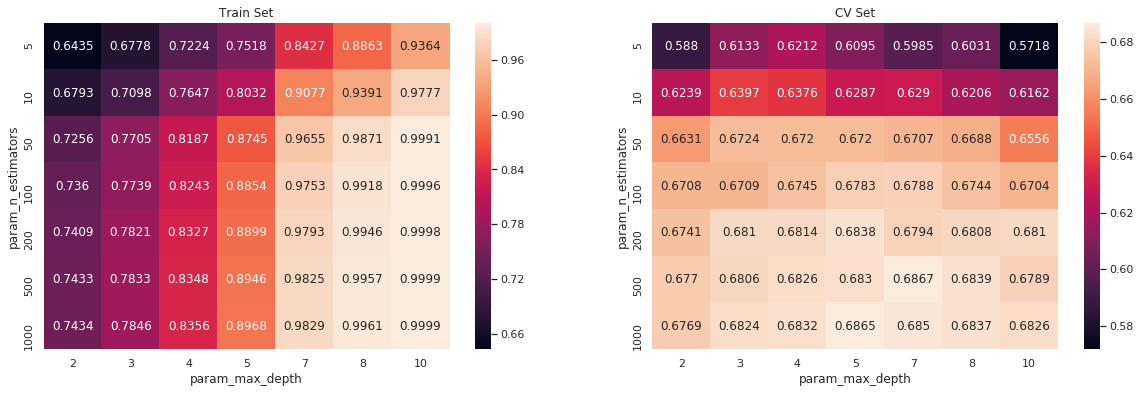

In [94]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

*****Best Estimator and best tune parameter***

---

**

In [101]:
print(clf3.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf3.score(X_set3_train,y_train))
print(clf3.score(X_set3_test,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9588587811640295
0.6896589714483923


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [500],  'max_depth':[7]  }  ]

**Fitting Model to Hyper-Parameter Curve:**

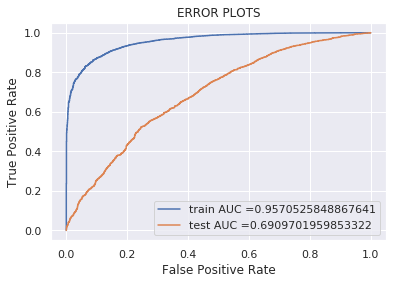

In [103]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set3_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set3_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set3_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**confusion matrix  test data**

the maximum value of tpr*(1-fpr) 0.79 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.41 for threshold 0.57


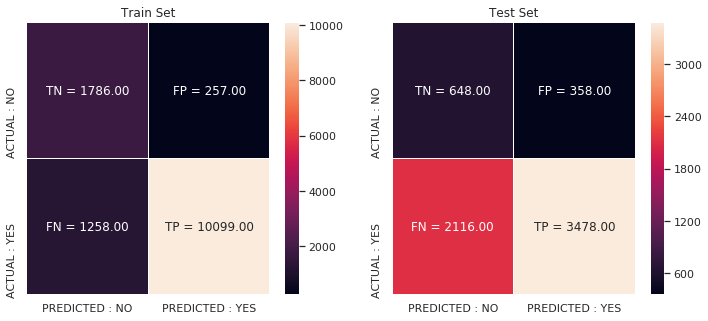

In [106]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Applying Random Forest on td_idf W2V, SET 4

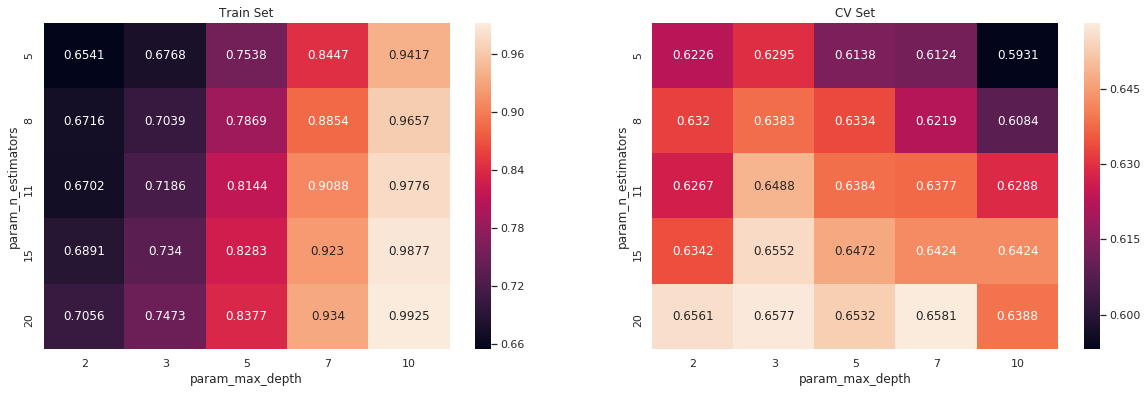

In [96]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt4 = RandomForestClassifier(class_weight='balanced',min_samples_split=5)

parameters = {'n_estimators': [5, 8,11,15,20], 'max_depth':[2, 3, 5,  7,  10] }
clf4 = GridSearchCV(dt4, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se4 = clf4.fit(X_set4_train, y_train)


import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


*****Best Estimator Best tune parameters***

---

**

In [107]:
print(clf4.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf4.score(X_set4_train,y_train))
print(clf4.score(X_set4_test,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.8989339054477712
0.6555587817393103


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [20],  'max_depth':[7]  }  ]

**Fitting Model to Hyper-Parameter Curve:**

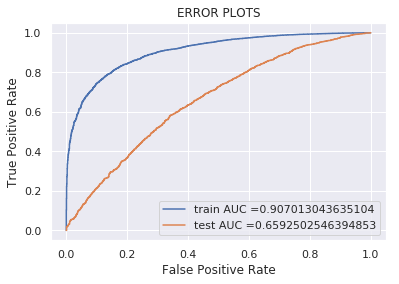

In [112]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced',min_samples_split=5),best_tune_parameters)
clf11.fit(X_set4_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set4_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set4_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

the maximum value of tpr*(1-fpr) 0.66 for threshold 0.53
the maximum value of tpr*(1-fpr) 0.4 for threshold 0.58


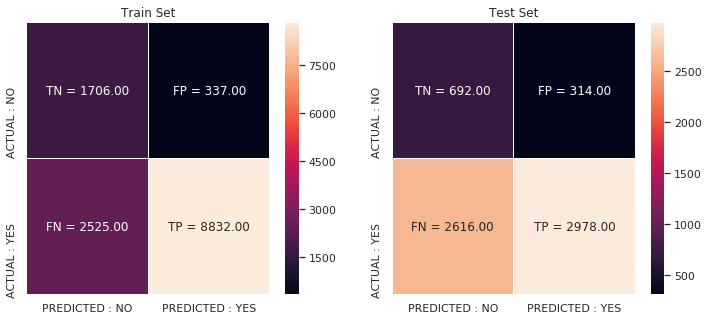

In [110]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn

import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# 2.Applying Gradient Boosted Decision Trees section

# Applying GBDT on Bow

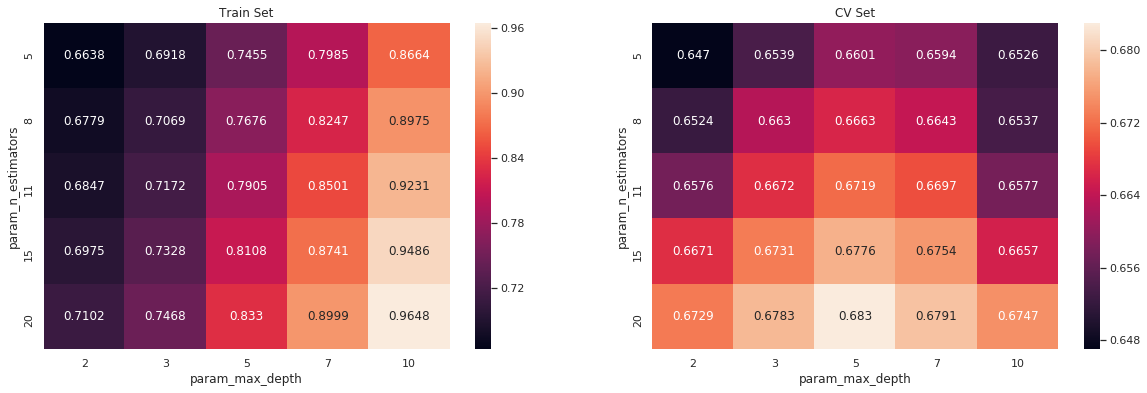

In [0]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
dt5 = GradientBoostingClassifier(min_samples_split=15)

parameters = {'n_estimators': [5, 8,11,15,20], 'max_depth':[2, 3, 5,  7,  10] }
clf5 = GridSearchCV(dt5, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se5 = clf5.fit(X_set1_train, y_train)


import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf5.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


**Best parameter**

In [0]:
print(clf5.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf5.score(X_set1_train,y_train))
print(clf5.score(X_set1_test,y_test))



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8141073290374755
0.6880048809751429


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [20],  'max_depth':[5]  }  ]

**Fitting Model to Hyper-Parameter Curve:**

---



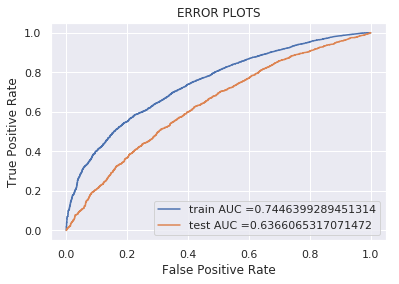

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set1_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set1_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set1_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

---



the maximum value of tpr*(1-fpr) 0.45 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.36 for threshold 0.5


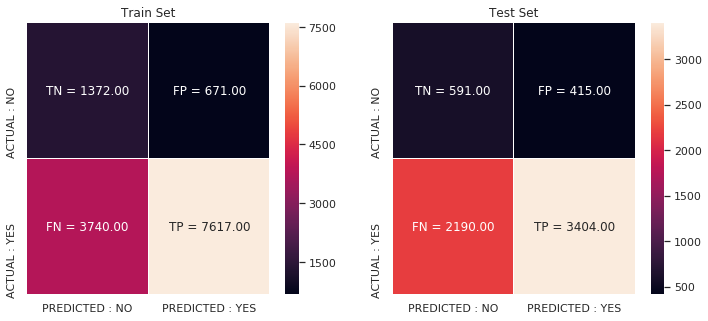

In [0]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Applying GBDT on tf-idf

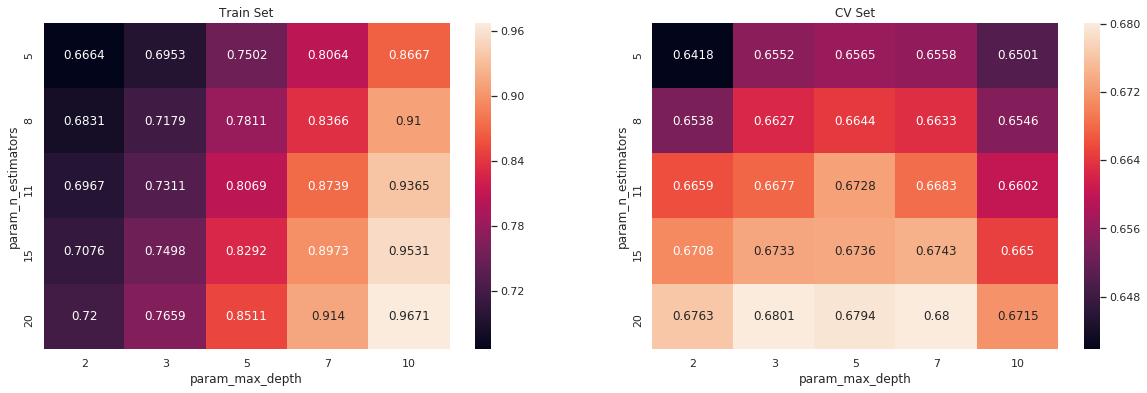

In [0]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt6 = GradientBoostingClassifier(min_samples_split=15)

parameters = {'n_estimators': [5, 8,11,15,20], 'max_depth':[2, 3, 5,  7,  10] }
clf6 = GridSearchCV(dt6, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se6 = clf6.fit(X_set2_train, y_train)


import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf6.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


**Best estimator**

---



In [0]:
print(clf6.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf6.score(X_set2_train,y_train))
print(clf6.score(X_set2_test,y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7419360650134117
0.6750927221796145


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [20],  'max_depth':[3]  }  ]

**Fitting the best hyperparameter**

---



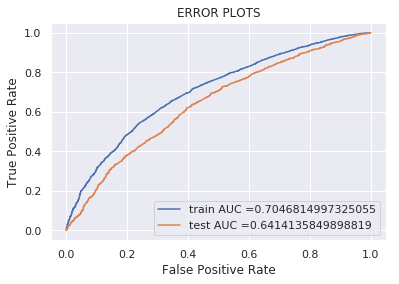

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set2_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set2_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set2_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

---



the maximum value of tpr*(1-fpr) 0.43 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.51


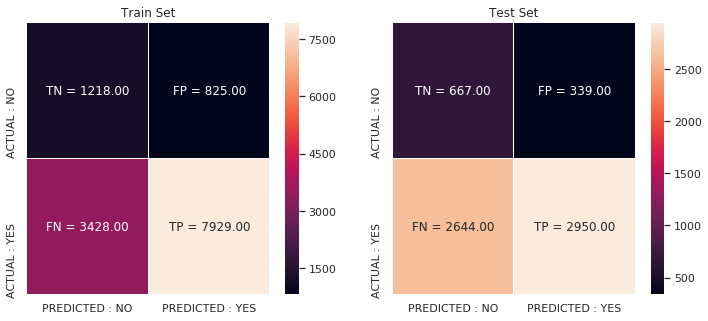

In [0]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Applying GBDT on w2v

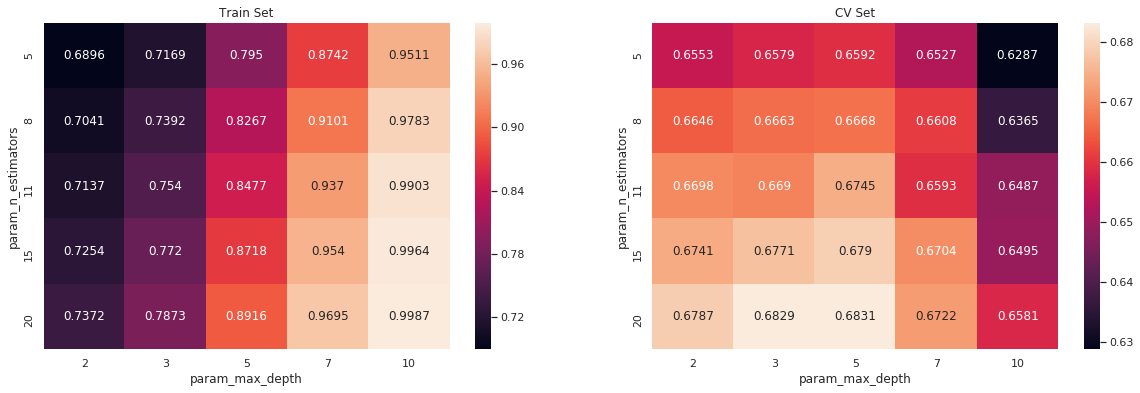

In [113]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
dt7 = GradientBoostingClassifier(min_samples_split=15)

parameters = {'n_estimators': [5, 8,11,15,20], 'max_depth':[2, 3, 5,  7,  10] }
clf7 = GridSearchCV(dt7, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se7 = clf7.fit(X_set3_train, y_train)


import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf7.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


**Best estimator**

---



In [121]:
print(clf7.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf7.score(X_set3_train,y_train))
print(clf7.score(X_set3_test,y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8621419872494818
0.697895217184558


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [20],  'max_depth':[5]  }  ]

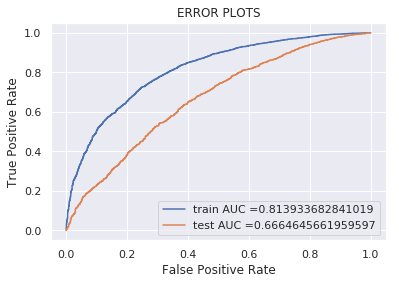

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set3_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set3_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set3_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


** Confusion matrix**

the maximum value of tpr*(1-fpr) 0.54 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.39 for threshold 0.54


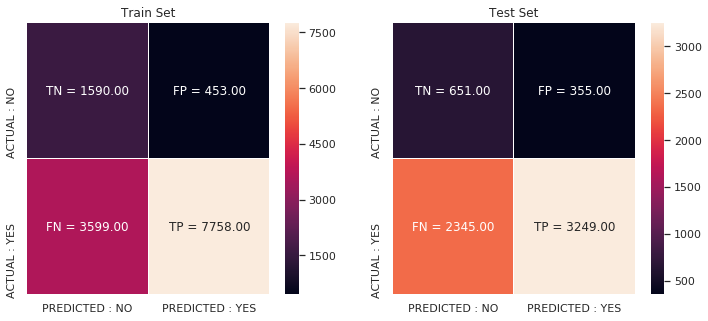

In [118]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

  # Applying GBDT on tf-idf  w2v

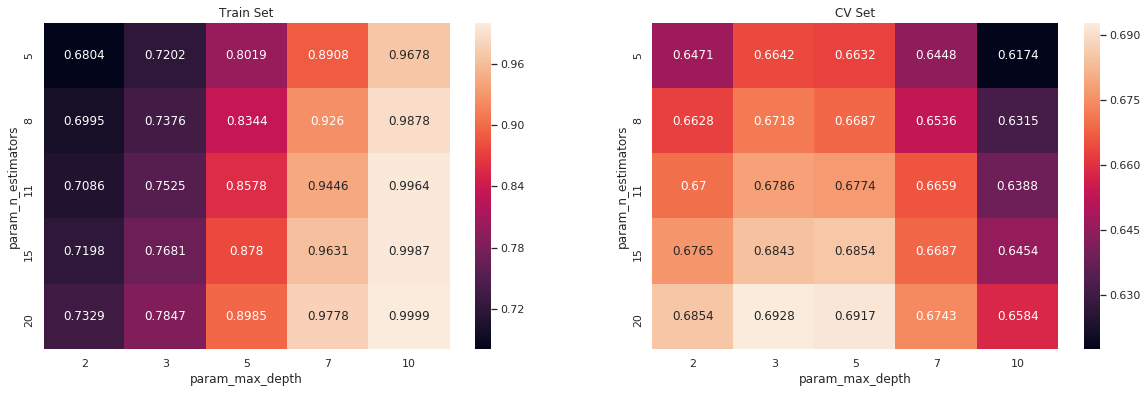

In [119]:
                                                                            # Issue 
# Some Issues due to max_depth and n_estimators  in the grid search:
# If i take max_depth and n_estimators  range greater  than 30  it cause runtimeout to my google colab. thats why i took range less.






from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt8 = GradientBoostingClassifier(min_samples_split=15)

parameters = {'n_estimators': [5, 8,11,15,20], 'max_depth':[2, 3, 5,  7,  10] }
clf8 = GridSearchCV(dt8, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se8 = clf8.fit(X_set4_train, y_train)


import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf8.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


In [120]:
print(clf8.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf8.score(X_set4_train,y_train))
print(clf8.score(X_set4_test,y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7605375420792488
0.6945960099254314


In [0]:
#  Best tune parameters
best_tune_parameters=[{'n_estimators': [20],  'max_depth':[3]  }  ]

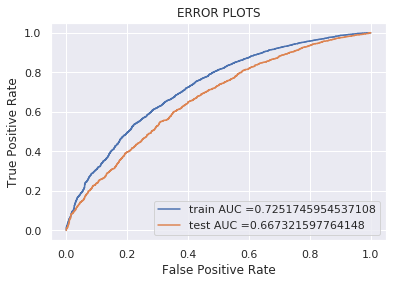

In [123]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf11 = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf11.fit(X_set3_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set3_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set3_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


the maximum value of tpr*(1-fpr) 0.44 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.39 for threshold 0.51


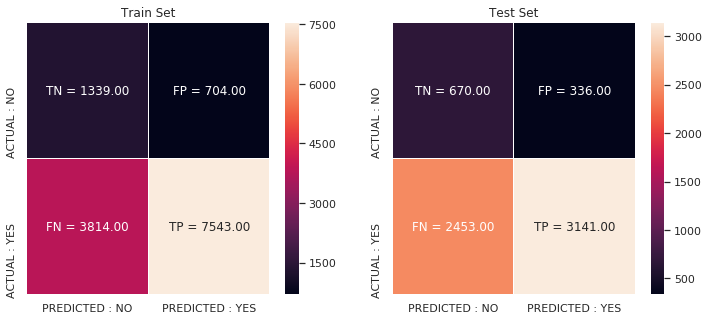

In [124]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# <h1>3. Conclusions</h1>

In [125]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/ 
from prettytable import PrettyTable 
tb = PrettyTable()
tb.field_names= ("  Model  ",                          " Vectorizer  ",              "  n_estimators  ", "  max_depth  ","  Test -AUC  ")
tb.add_row([   "Random Forest",                        "  BOW ",                          1000,                     10,                            71                        ])
tb.add_row([       "Random Forest",                      "   Tf - Idf",                            500 ,                   10 ,                            71                      ]) 
tb.add_row([          "Random Forest",                          "  AVG-W2V",                    500,                  7 ,                            69                  ]) 
tb.add_row([             "Random Forest",                              "  A VG -  Tf - Idf",           20  ,                   7 ,                             66                ]) 


tb.add_row([                 "Gradient Boosting DT",                         "  Bow ",                      20 ,                  5 ,                             63                ]) 
tb.add_row([                    "Gradient Boosting DT",                              " Tf -  Idf",                20  ,                  3 ,                             64               ]) 
tb.add_row([                      "Gradient Boosting DT",                                    "  AVG-W2V",        20 ,                  5 ,                             67                ]) 
tb.add_row([                        "Gradient Boosting DT",                                        " A VG -  Tf - Idf",   20  ,                  3 ,                             67                ]) 



  
  
print(tb.get_string(titles = "Random Forest and GBDT- Observations")) #print(tb)


+----------------------+--------------------+------------------+---------------+---------------+
|        Model         |    Vectorizer      |   n_estimators   |   max_depth   |   Test -AUC   |
+----------------------+--------------------+------------------+---------------+---------------+
|    Random Forest     |         BOW        |       1000       |       10      |       71      |
|    Random Forest     |       Tf - Idf     |       500        |       10      |       71      |
|    Random Forest     |       AVG-W2V      |       500        |       7       |       69      |
|    Random Forest     |   A VG -  Tf - Idf |        20        |       7       |       66      |
| Gradient Boosting DT |         Bow        |        20        |       5       |       63      |
| Gradient Boosting DT |      Tf -  Idf     |        20        |       3       |       64      |
| Gradient Boosting DT |       AVG-W2V      |        20        |       5       |       67      |
| Gradient Boosting DT |  A VG